# Анализ аудиоданных с помощью глубокого обучения и Python

Напишем нейронную сеть, которая будет классифицировать музыку по жанрам. 

Для начала работы нам понадобится собрать датасет. Основу возьмём GTZAN Dataset (https://www.kaggle.com/datasets/andradaolteanu/gtzan-dataset-music-genre-classification). 
Данный датасет - коллекция из 10 жанров по 100 аудиофайлов в каждом, все продолжительностью 30 секунд в формате wav. 

В датасет входят такие жанры как:

1. Блюз
2. Классичекая
3. Кантри
4. Диско
5. Хип хоп
6. Джаз
7. Металл
8. Поп
9. Рок
10. Регги 



Добавим несколько дополнительных жанров по 100 аудифайлов также продолжительностью в 30 секунд.

Для этого необходимо урезать аудиофайлы до 30 сек (первых) и конвертирвать в из mp3 в wav. Для этого нам понадобится библиотека PyDdub (https://pydub.com/). 

Так же необхолимо переименовать аудио в формате жанр.####, например: blues.00000

In [1]:
import os

In [2]:
from pydub import AudioSegment

In [3]:
# директорий хранения полных аудио файлов
patch_full_audio = 'E:/music/full'
# директорий хранения урезанных аудио файлов
patch_mini_audio = 'E:/music/mini'

In [5]:
name_files_from_dir = [f for f in os.listdir(patch_full_audio)]
for name_files in name_files_from_dir:
    print(name_files)
    path_file = patch_full_audio + '/' + name_files
    name_audio_from_dir = [f for f in os.listdir(path_file)]
    num = 0
    for name_audio in name_audio_from_dir:
        print(name_audio)
        song = AudioSegment.from_mp3(path_file + '/' + name_audio)
        end_time_sec = 30
        # Time to miliseconds
        startTime = 0
        endTime = end_time_sec * 1000 
        # обрезка аудио файла
        slice_song = song[startTime:endTime]

        pathSaveModel = patch_mini_audio + '/' + name_files
        # создание папки, если ее нет в директории
        if not os.path.exists(pathSaveModel):
            os.makedirs(pathSaveModel)
        
        name = name_files + '.' + f'{num:05}'
        # сохранение обрезанного файла в формате wav
        slice_song.export(pathSaveModel + "/" + name + ".wav", format="wav") 
        num += 1               


indi
Alice_Cooper_-_Poison_47962212.mp3
aljona_shvec_-_17_61213702.mp3
aljona_shvec_-_Glukhojj_muzykant_slepojj_khudozhnik_61213706.mp3
aljona_shvec_-_KHimicheskijj_jelement_59801717.mp3
aljona_shvec_-_Kudryavye_59801715.mp3
aljona_shvec_-_Malchik_iz_Pitera_59801713.mp3
aljona_shvec_-_Moyu_pervuyu_lyubov_zvali_nenavist_61213712.mp3
aljona_shvec_-_Nelyubov_59801714.mp3
aljona_shvec_-_Sopernica_59801718.mp3
aljona_shvec_-_Tvoya_shkolnica_59801716.mp3
aljona_shvec_-_zhvachka_61213708.mp3
AnnenMayKantereit_Giant_Rooks_-_Toms_Diner_65359697.mp3
Arctic_Monkeys_-_Do_I_Wanna_Know_47842902.mp3
Arctic_Monkeys_-_I_Wanna_Be_Yours_47842917.mp3
Arctic_Monkeys_-_Whyd_You_Only_Call_Me_When_Youre_High_59782647.mp3
Aurora_-_Runaway_48098297.mp3
Backstreet_Boys_-_Everybody_Backstreets_Back_47962925.mp3
BENEE_Gus_Dapperton_-_Supalonely_68799276.mp3
Billie_Eilish_-_all_the_good_girls_go_to_hell_63154739.mp3
Billie_Eilish_-_bad_guy_63154737.mp3
Billie_Eilish_-_bellyache_47841904.mp3
Billie_Eilish_-_Bored_49

Для дальнейшей работы нам потребуется библиотека librosa. 

In [6]:
import librosa

librosa поддерживает файлы в формате wav. Загрузим предварительно обработанные айдио файлы.

In [28]:
audio_data = patch_mini_audio + '/kpop' + '/kpop.00013.wav'

In [29]:
song = AudioSegment.from_wav(audio_data)
song

In [30]:
x , sr = librosa.load(audio_data)
print(type(x), type(sr))
print(x.shape, sr)

<class 'numpy.ndarray'> <class 'int'>
(661500,) 22050


Получем звуковой временной ряд в качестве массива numpy с частотой дискретизации по умолчанию 22 кГц моно.

Это поведение можно изменить, так загрузка с частотой 44,1 кГц : librosa.load(audio_data, sr=44100).

Частота дискретизации — это количество аудио семплов, передаваемых в секунду, которое измеряется в Гц или кГц.

Построим график массива аудио.

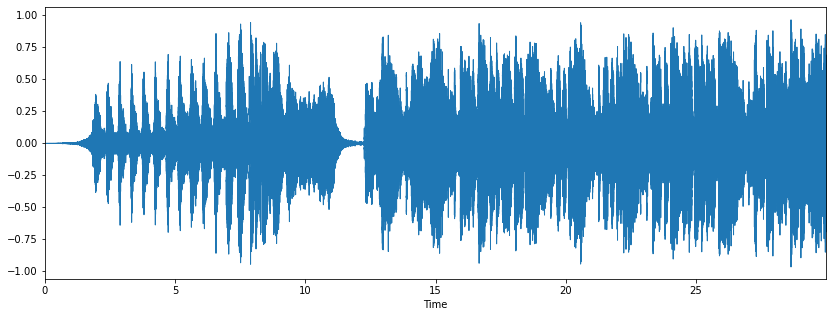

In [31]:
%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display

plt.figure(figsize=(14, 5))
librosa.display.waveplot(x, sr=sr)

Получение спектограммы

Спектрограмма — это визуальный способ представления уровня или «громкости» сигнала во времени на различных частотах, присутствующих в форме волны. Обычно изображается в виде тепловой карты.

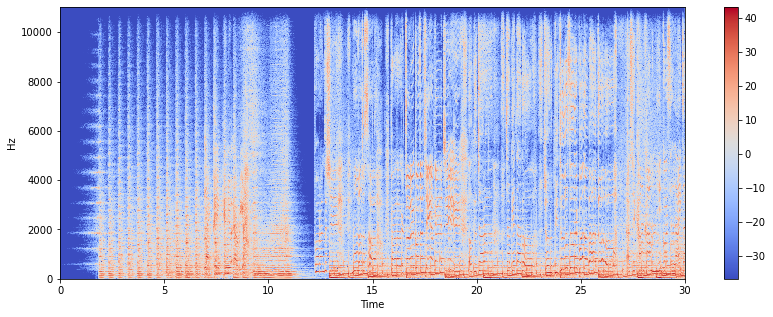

In [32]:
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()

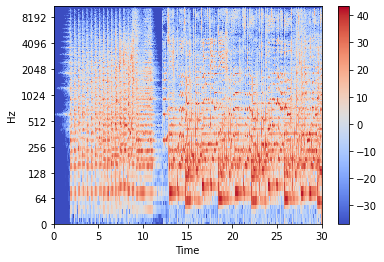

In [33]:
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
plt.colorbar()